In [1]:
import os
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras import models, layers

In [2]:
DIR = "Vehicle/"

images = []
class_list = []
class_label = ["Airplane", "Car", "Ship"]

for i, class_name in enumerate(os.listdir(DIR)):
    for j, file_name in enumerate(os.listdir(os.path.join(DIR, class_name))):
        img = load_img(os.path.join(DIR,class_name,file_name))
        img = img_to_array(img)

        gray = tf.image.rgb_to_grayscale(img)
        gray = gray / 255.0
        resized = tf.image.resize(gray, (256,256))

        images.append(resized)
        class_list.append(i)
        print(f"Class: {class_name}, File: {file_name}")

Class: airplanes, File: airplane1.jpg
Class: airplanes, File: airplane10.jpg
Class: airplanes, File: airplane100.jpg
Class: airplanes, File: airplane1000.jpg
Class: airplanes, File: airplane101.jpg
Class: airplanes, File: airplane102.jpg
Class: airplanes, File: airplane103.jpg
Class: airplanes, File: airplane104.jpg
Class: airplanes, File: airplane105.jpg
Class: airplanes, File: airplane106.jpg
Class: airplanes, File: airplane107.jpg
Class: airplanes, File: airplane108.jpg
Class: airplanes, File: airplane109.jpg
Class: airplanes, File: airplane11.jpg
Class: airplanes, File: airplane110.jpg
Class: airplanes, File: airplane111.jpg
Class: airplanes, File: airplane112.jpg
Class: airplanes, File: airplane113.jpg
Class: airplanes, File: airplane114.jpeg
Class: airplanes, File: airplane115.jpg
Class: airplanes, File: airplane116.jpg
Class: airplanes, File: airplane117.jpg
Class: airplanes, File: airplane118.jpg
Class: airplanes, File: airplane119.jpg
Class: airplanes, File: airplane12.jpg
Cla

In [3]:
y = tf.keras.utils.to_categorical(class_list, num_classes=len(class_label))
X = np.asarray(images)
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)
X_test, X_val, y_test, y_val = train_test_split(X_test,y_test, test_size=0.5, random_state=42)

In [4]:
model = models.Sequential([
    layers.Conv2D(32, (3,3), activation="relu", input_shape=(256,256,1)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation="relu"),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(128, (3,3),activation="relu"),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(128, activation="relu"),
    layers.Dense(3, activation="softmax")
])
model.summary()

c:\Users\Asus\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 254, 254, 32)   │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 127, 127, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 125, 125, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 62, 62, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 60, 60, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 30, 30, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 115200)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │    14,745,728 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 3)              │           387 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,838,787 (56.61 MB)

 Trainable params: 14,838,787 (56.61 MB)

 Non-trainable params: 0 (0.00 B)

In [5]:
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

In [6]:
early_stopping = tf.keras.callbacks.EarlyStopping(monitor="val_loss", patience=3)
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_val, y_val), callbacks=[early_stopping])

Epoch 1/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 103s 1s/step - accuracy: 0.5429 - loss: 1.4927 - val_accuracy: 0.7433 - val_loss: 0.6190
Epoch 2/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 93s 1s/step - accuracy: 0.8191 - loss: 0.4553 - val_accuracy: 0.8567 - val_loss: 0.3950
Epoch 3/10
26/75 ━━━━━━━━━━━━━━━━━━━━ 55s 1s/step - accuracy: 0.8915 - loss: 0.3081

KeyboardInterrupt: 

In [16]:
preds = model.predict(X_test[:20])
actuals = y_test[:20]
for i in range(20):
    print(f"Prediction: {class_label[np.argmax(preds[i])]}, Actual: {class_label[np.argmax(actuals[i])]}")


loss, accuracy = model.evaluate(X_test, y_test)
print(loss, accuracy)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 225ms/step
Prediction: Car, Actual: Airplane
Prediction: Ship, Actual: Ship
Prediction: Car, Actual: Car
Prediction: Car, Actual: Car
Prediction: Ship, Actual: Ship
Prediction: Airplane, Actual: Car
Prediction: Airplane, Actual: Car
Prediction: Ship, Actual: Airplane
Prediction: Car, Actual: Car
Prediction: Car, Actual: Car
Prediction: Car, Actual: Airplane
Prediction: Ship, Actual: Ship
Prediction: Ship, Actual: Ship
Prediction: Car, Actual: Car
Prediction: Airplane, Actual: Airplane
Prediction: Ship, Actual: Ship
Prediction: Ship, Actual: Ship
Prediction: Ship, Actual: Ship
Prediction: Airplane, Actual: Airplane
Prediction: Ship, Actual: Ship
38/38 ━━━━━━━━━━━━━━━━━━━━ 11s 276ms/step - accuracy: 0.8073 - loss: 0.8568
0.7669470310211182 0.8166666626930237


(0.0, 1.0)

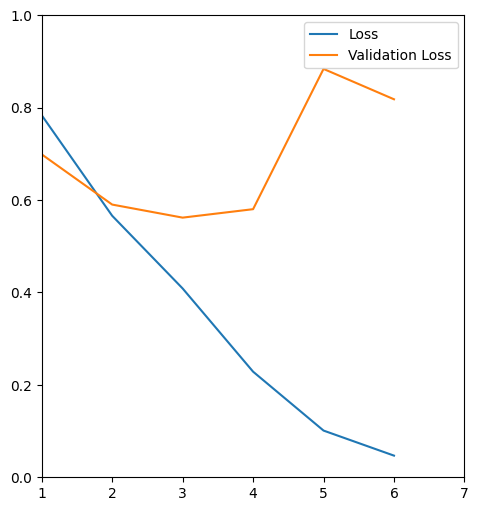

In [21]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.plot(history.history["loss"], label ="Loss")
plt.plot(history.history["val_loss"], label="Validation Loss")
plt.legend()
plt.xlim((1, len(history.history["loss"])))
plt.ylim((0,1))
